In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

/Users/hernando/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/Users/hernando/Desktop/datamining1/assign2/2nd-assignment-dmt-2020/training_set_VU_DM.csv',sep=',')
test = pd.read_csv('/Users/hernando/Desktop/datamining1/assign2/2nd-assignment-dmt-2020/test_set_VU_DM.csv',sep=',')


In [3]:
all_data = pd.concat((train,test)).reset_index(drop=True)

In [33]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data = missing_data.drop(index=['position','click_bool','booking_bool'],axis=1)

In [36]:
missing_data.shape

(31, 1)

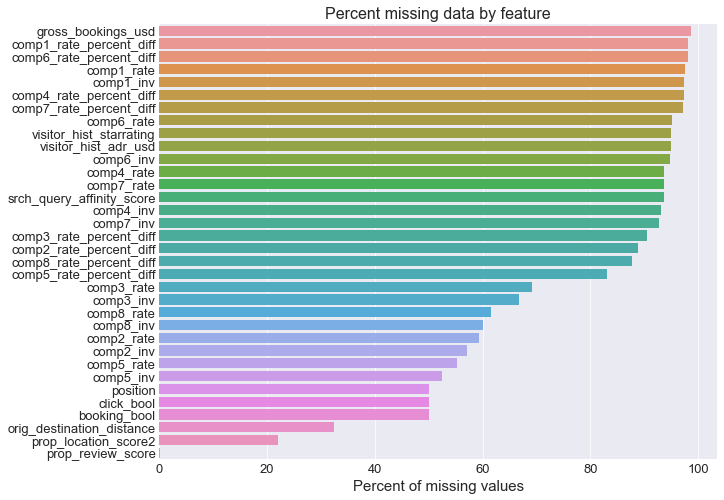

In [35]:
plt.figure(figsize=(10, 8))
plt.title('Percent missing data by feature', fontsize=16)
sns.barplot(y=all_data_na.index, x=all_data_na,orient='h',dodge=False)
plt.yticks(size=13)
plt.xticks(size=13)
plt.xlabel('Percent of missing values', fontsize=15)
plt.savefig('missingvalue.jpg',dpi=200,bbox_inches='tight')

Text(0.5, 1.0, 'Percent missing data by feature')

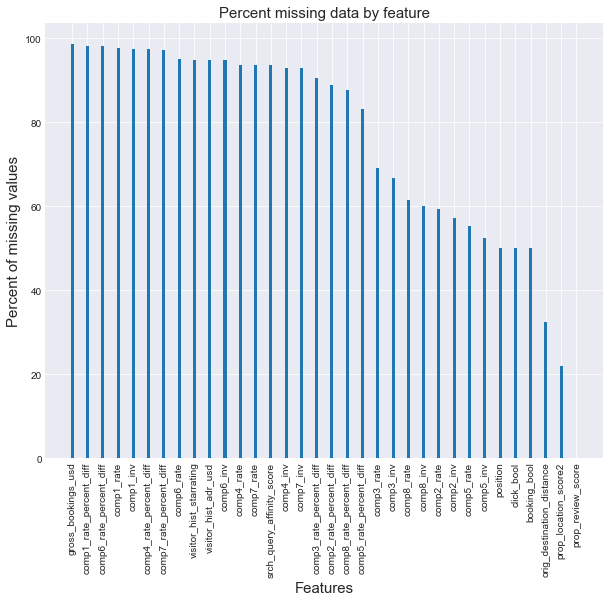

In [30]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation='90')
plt.bar(all_data_na.index, all_data_na,width=0.2,align='center')
# missing_data.plot(kind='bar')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

plt.title('Percent missing data by feature', fontsize=15)

In [37]:
df_book = train.loc[train['booking_bool']==1]
df_click =train.loc[train["click_bool"]==1]

df_book=df_book[["srch_id", "position"]]
df_click=df_click[["srch_id", "position"]]
position_count= df_book.groupby("position").count()
position_count_c= df_click.groupby("position").count()

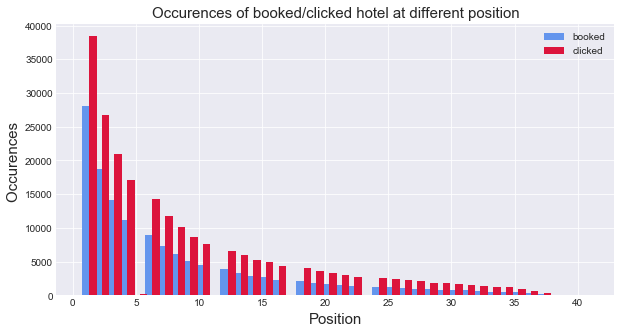

In [8]:
xaxes=[i for i in range(1,41)]
fig, ax = plt.subplots(figsize=(10,5))
width = 0.6
ax.bar(xaxes,position_count.iloc[:,0], width, color="#6495ED", label="booked")
xaxes=[i+width for i in xaxes]
ax.bar(xaxes,position_count_c.iloc[:,0], width, color="#DC143C",label="clicked")
plt.title("Occurences of booked/clicked hotel at different position",size=15)
plt.xlabel("Position",size=15)
plt.ylabel("Occurences ",size=15)
plt.legend()

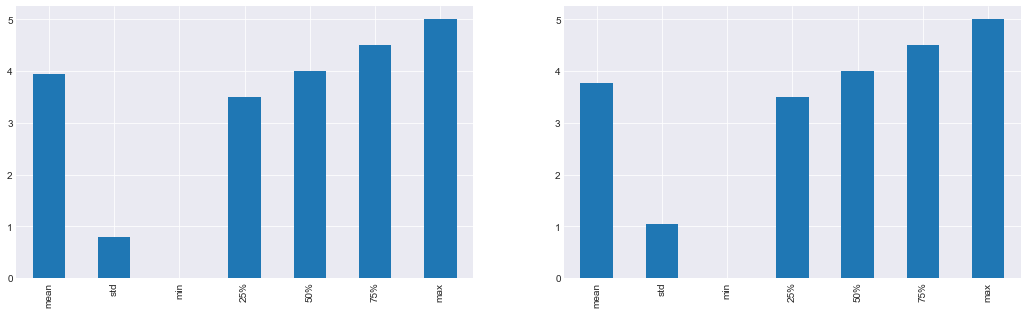

In [9]:
fig, ax = plt.subplots(figsize=(18,5))
plt.subplot(1,2,1)
train['prop_review_score'][train['booking_bool']==1].describe()[1:].plot(kind='bar')
plt.subplot(1,2,2)
train['prop_review_score'].describe()[1:].plot(kind='bar')

# Missing value of 

In [61]:
comp_3 = train[['comp3_rate','booking_bool']].copy()
comp_3.fillna(100,inplace=True)
comp_3_1 = comp_3[comp_3['booking_bool']==1]

In [71]:
kkk = comp_3.groupby('comp3_rate').count()
zzz = comp_3_1.groupby('comp3_rate').count()
hhh=zzz/kkk

In [74]:
hhh.index=['-1','0','1','NA']

In [150]:
[train['visitor_hist_starrating'][train['booking_bool']==1].median(),train['visitor_hist_starrating'][train['booking_bool']==0].median()]

[3.43, 3.45]

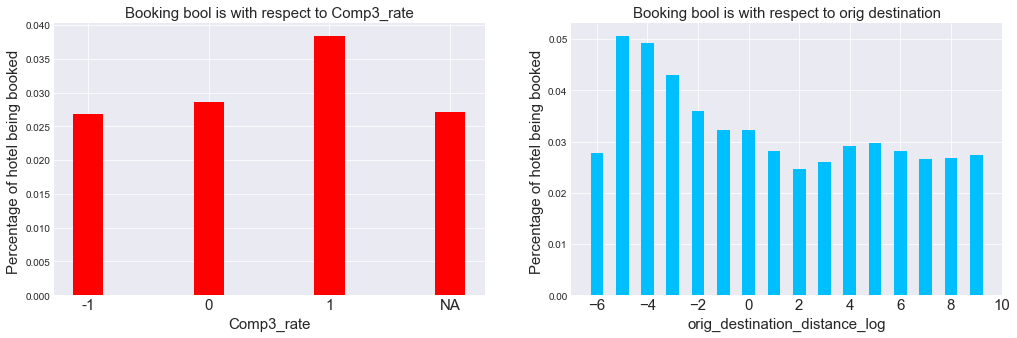

In [177]:
plt.subplots(figsize=(17,5))
plt.subplot(121)
plt.bar(hhh.index,hhh.booking_bool.values,width=0.25,color='r')
plt.xlabel('Comp3_rate',size=15)
plt.ylabel('Percentage of hotel being booked ',size=15)
plt.title('Booking bool is with respect to Comp3_rate',size=15)
plt.xticks(size=15)
# plt.subplot(222)
# plt.bar(1,[train['visitor_hist_starrating'][train['booking_bool']==1].median()],width=0.1)
# plt.xlim(0.5,1.5)
# # plt.bar(np.arange(0,7,1)+0.1,train['visitor_hist_starrating'][train['booking_bool']==0].describe()[1:],width=0.2)
# # plt.yscale('log')

# hhh.plot(kind='bar')
# plt.xticks(['mean', 'std', 'min', '25%', '50%', '75%', 'max'],rotation='90')
plt.subplot(122)
plt.bar(orig.levels,orig.b_per,color='#00BFFF',width=0.5)
plt.xlabel('orig_destination_distance_log',size=15)
plt.ylabel('Percentage of hotel being booked ',size=15)
plt.title('Booking bool is with respect to orig destination',size=15)
plt.xticks(size=15)
plt.savefig('miss_process.jpg',dpi=200,bbox_inches='tight')
# orig.plot(x="levels", y="b_per", kind="bar")

In [92]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [128]:
pd.DataFrame(train['visitor_hist_starrating'][train['booking_bool']==1].describe()[1:])

,visitor_hist_starrating
mean,3.367019
std,0.696493
min,1.410000
25%,2.900000
50%,3.430000
75%,3.930000
max,5.000000


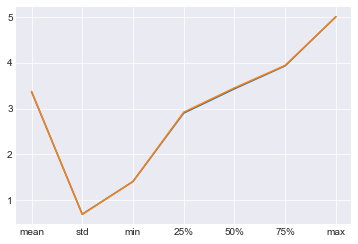

In [130]:
train['visitor_hist_starrating'][train['booking_bool']==1].describe()[1:].plot()
train['visitor_hist_starrating'][train['booking_bool']==0].describe()[1:].plot()

In [136]:
def ratedist(train, name, steps, navalue):
    
    train[name+"_step"] = np.round(train[name]/steps)
    train[name+"_step"][pd.isnull(train[name])] = navalue
    rate_list = []
    c_per_list = []
    b_per_list = []
    for rate, gp in train.groupby(name+"_step"):
        rate_list.append(rate)
        c_per_list.append(1.0*gp["click_bool"].mean())
        b_per_list.append(1.0*gp["booking_bool"].mean())
    df = pd.DataFrame(np.array([rate_list, c_per_list, b_per_list]), index=["levels","c_per", "b_per"])
    df = df.transpose()
    return df


In [133]:
train["orig_destination_distance_log"] = np.log(train["orig_destination_distance"])
train["orig_destination_distance_log"].describe()

count    3.350565e+06
mean     5.961194e+00
std      1.855231e+00
min     -4.605170e+00
25%      4.940213e+00
50%      5.957391e+00
75%      7.313667e+00
max      9.364489e+00
Name: orig_destination_distance_log, dtype: float64

In [138]:
orig = ratedist(train, "orig_destination_distance_log", 1, -6)

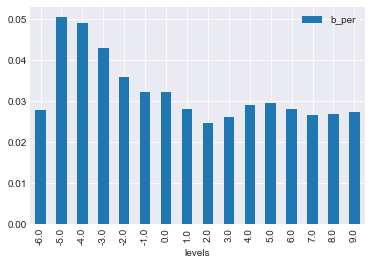

In [140]:
orig.plot(x="levels", y="b_per", kind="bar")

In [145]:
orig

,levels,c_per,b_per
0,-6.0,0.046366,0.027795
1,-5.0,0.086643,0.050542
2,-4.0,0.073770,0.049180
3,-3.0,0.058489,0.043054
4,-2.0,0.051292,0.035866
5,-1.0,0.047839,0.032334
6,0.0,0.048382,0.032224
7,1.0,0.043231,0.028112
8,2.0,0.038233,0.024620
9,3.0,0.039779,0.026080


In [183]:
train.groupby('prop_id').agg({'prop_location_score1':'mean'})

,prop_location_score1
prop_id,
1,3.04
2,0.69
3,0.69
4,4.88
5,6.02
...,...
140817,4.43
140818,4.17
140819,5.37
